Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("./data/Train")
data_dir_test = pathlib.Path('./data/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    color_mode="rgb",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

train_ds

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    color_mode="rgb",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [9]:
num_classes = len(class_names)
print(num_classes)
val_ds

9


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

2024-11-23 22:21:32.979436: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


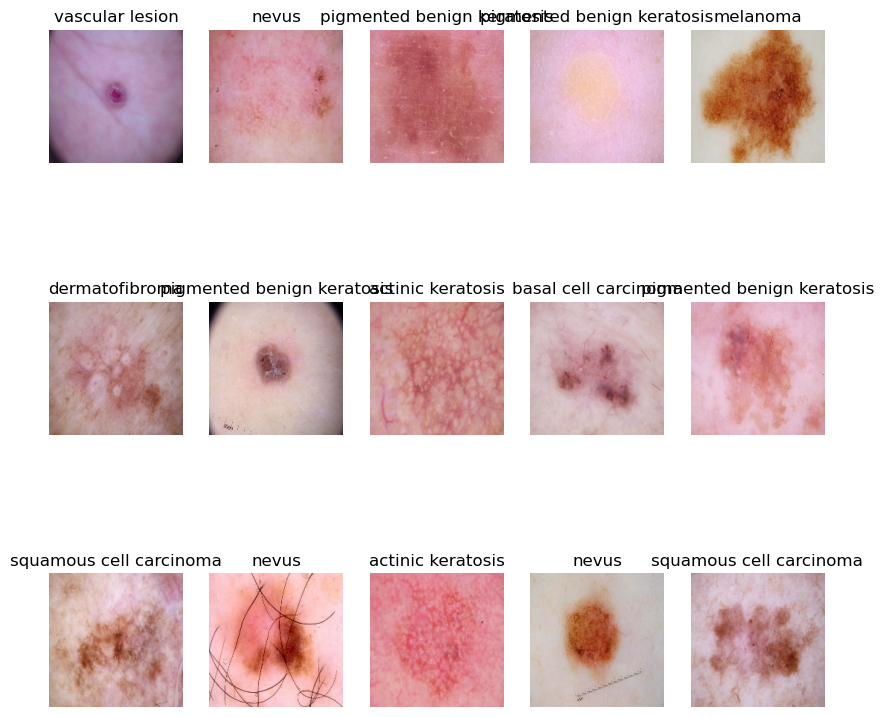

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [12]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
from tensorflow.keras.layers import InputLayer, Rescaling, Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.python.keras import regularizers

# model = Sequential()
# model.add(Rescaling(1./255, input_shape=(180, 180, 3)))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(180, 180, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(BatchNormalization())
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(180, 180, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))



model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(9, activation='softmax')
])

print(model.summary())


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 59168)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,893,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,898,793 (7.24 MB)

 Trainable params: 1,898,793 (7.24 MB)

 Non-trainable params: 0 (0.00 B)

None


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 59168)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,893,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,898,793 (7.24 MB)

 Trainable params: 1,898,793 (7.24 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
def preprocess(image, label):
    # ... other preprocessing steps ...
    # One-hot encode the label
    label = tf.keras.utils.to_categorical(label, num_classes=9)  
    return image, label

# Apply the preprocessing function to your datasets
train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.1792 - loss: 4.9213 - val_accuracy: 0.2841 - val_loss: 1.9428
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.3543 - loss: 1.7995 - val_accuracy: 0.4452 - val_loss: 1.6480
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.4176 - loss: 1.6297 - val_accuracy: 0.4966 - val_loss: 1.4774
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.5009 - loss: 1.4296 - val_accuracy: 0.4653 - val_loss: 1.6288
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.5246 - loss: 1.4205 - val_accuracy: 0.5391 - val_loss: 1.4230
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.5675 - loss: 1.2376 - val_accuracy: 0.4385 - val_loss: 1.5979
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.6091 - loss: 1.1105 - val_accuracy: 0.4944 - val_loss: 1.6442
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.6723 - loss: 0.9912 - val_accuracy: 0.5168 - v

### Visualizing training results

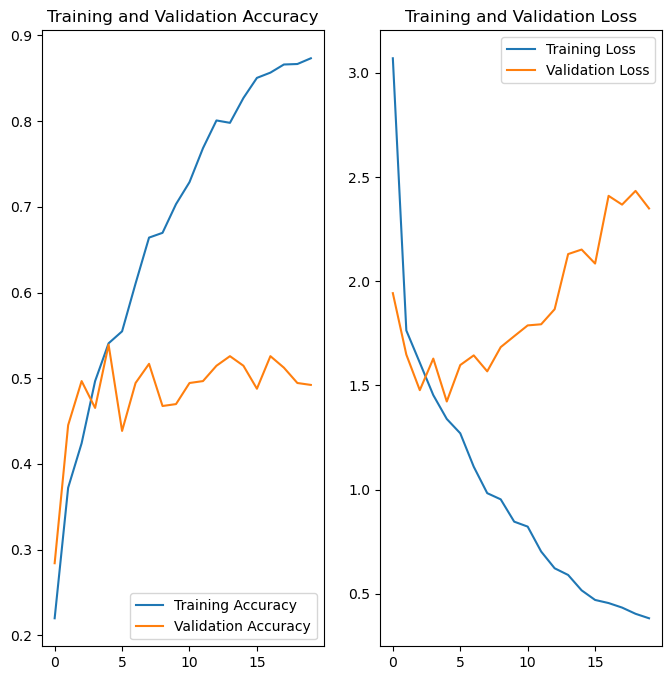

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Model is overfitting as training accuracy is better than validation accuracy. Even loss function depicts the similar pattern with Training and validation data sets.

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# data_augmentation = keras.Sequential([
#   layers.RandomFlip("horizontal_and_vertical"),
#   layers.RandomRotation(0.4),
  
# ])
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator(rescale=1./255, 
                             rotation_range=20, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='nearest' 
                            )

aug_generator = datagen.flow_from_directory(
    directory=r"./data/Train",
    target_size=(180, 180),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)



Found 2239 images belonging to 9 classes.


2024-11-23 22:22:54.658903: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


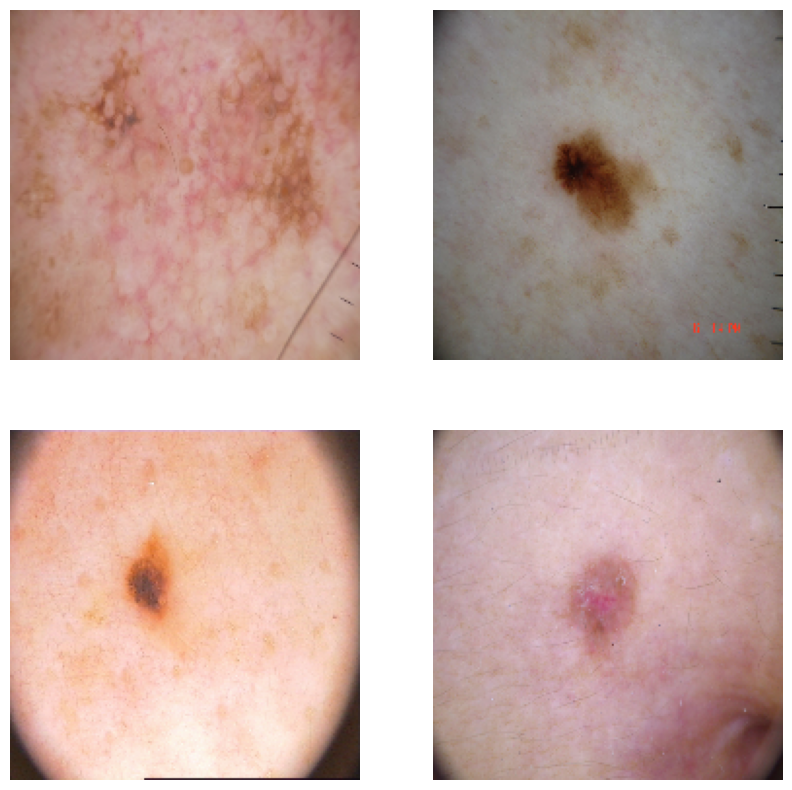

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
    
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    #augmented_image = data_augmentation(images[i])
    augmented_image = images[i]
    plt.imshow(augmented_image.numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = tf.keras.Sequential([
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(9, activation='softmax')
])

print(model.summary())




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Compiling the model

In [22]:
model.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  aug_generator,
  validation_data=val_ds,
  epochs=epochs
)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 310ms/step - accuracy: 0.1796 - loss: 2.0754 - val_accuracy: 0.1924 - val_loss: 13.7613
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 315ms/step - accuracy: 0.2074 - loss: 2.0479 - val_accuracy: 0.2058 - val_loss: 4.6365
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 312ms/step - accuracy: 0.2050 - loss: 2.0133 - val_accuracy: 0.1946 - val_loss: 3.4832
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 308ms/step - accuracy: 0.1831 - loss: 2.0344 - val_accuracy: 0.1991 - val_loss: 5.3267
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 310ms/step - accuracy: 0.2077 - loss: 2.0068 - val_accuracy: 0.1499 - val_loss: 7.9439
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 311ms/step - accuracy: 0.1976 - loss: 2.0338 - val_accuracy: 0.1499 - val_loss: 8.5783
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 306ms/step - accuracy: 0.2180 - loss: 2.0314 - val_accuracy: 0.1499 - val_loss: 11.3587
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 304ms/step - accuracy: 0.2013 - loss: 2.0363 - val_ac

### Visualizing the results

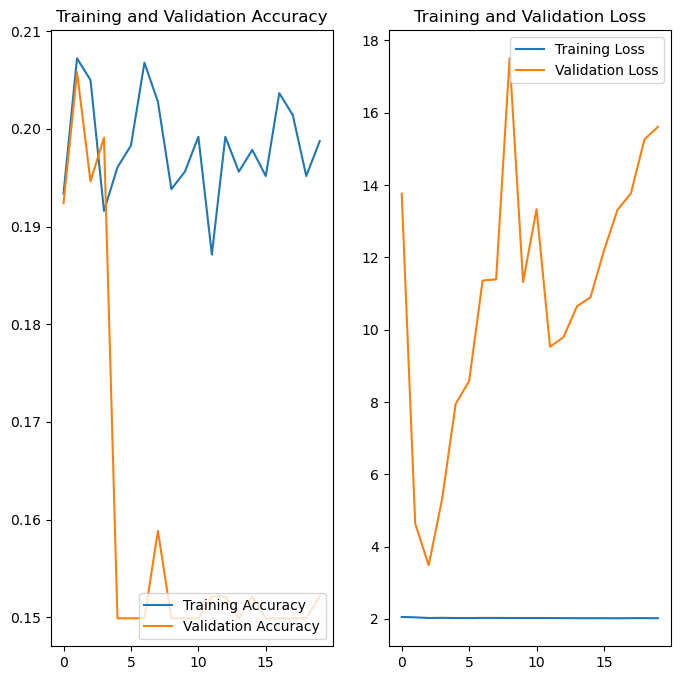

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Validatino accuracy is better after adding dropout layer. Also validation loss is better aligned

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

Class Distribution in Training Dataset:
actinic keratosis: 14336
basal cell carcinoma: 1792
dermatofibroma: 0
melanoma: 0
nevus: 0
pigmented benign keratosis: 0
seborrheic keratosis: 0
squamous cell carcinoma: 0
vascular lesion: 0


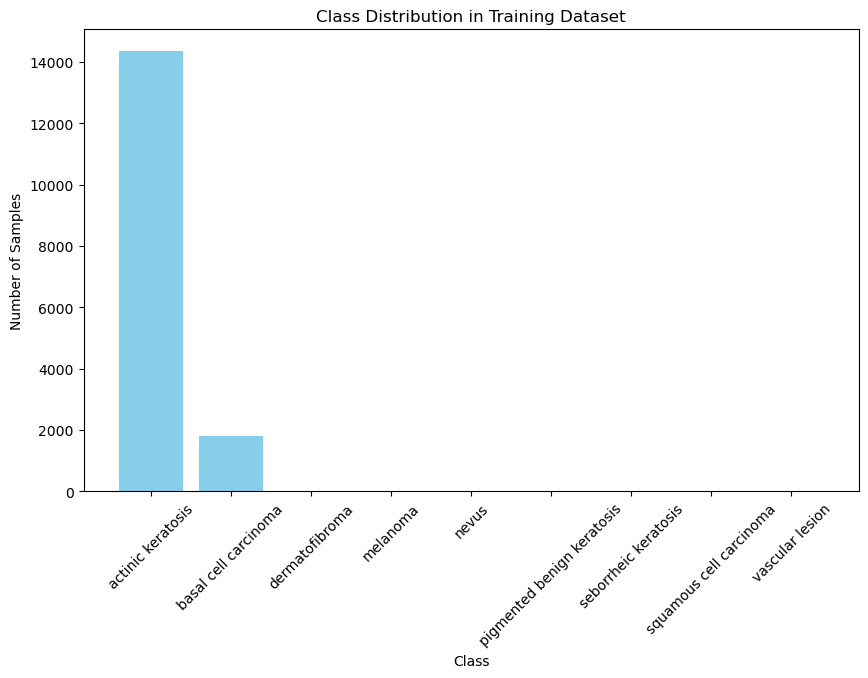

In [25]:
from collections import Counter
# Initialize a list to store labels
labels = []

# Extract labels from the dataset
for _, label_batch in train_ds:
    # Flatten the label batch to 1D array, convert to list, and extend the labels list
    labels.extend(label_batch.numpy().flatten().tolist())


    
# Count the occurrences of each class
class_distribution = Counter(labels)

# Map counts to class names
class_distribution_named = {class_names[k]: class_distribution[k] for k in range(len(class_names))}

# Print the distribution
print("Class Distribution in Training Dataset:")
for class_name, count in class_distribution_named.items():
    print(f"{class_name}: {count}")

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(class_distribution_named.keys(), class_distribution_named.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=45)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
###   pigmented benign keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
### 1. basal cell carcinoma
### 2. melanoma
### 3. pigmented benign keratosis
### 4. nevus


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
path_to_training_dataset='./data/Train/';
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to ./data/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x3


Initialised with 376 image(s) found.
Output directory set to ./data/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3039B4690>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to ./data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3241E9FD0>: 100%|█|


Initialised with 438 image(s) found.
Output directory set to ./data/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 357 image(s) found.
Output directory set to ./data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x3241D7910>: 100%|█|


Initialised with 462 image(s) found.
Output directory set to ./data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3241C1F10>: 100%|█|


Initialised with 77 image(s) found.
Output directory set to ./data/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 181 image(s) found.
Output directory set to ./data/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x3


Initialised with 139 image(s) found.
Output directory set to ./data/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x3


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
from glob import glob
g = glob('*.jpg')
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
original_path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list

['data/Train/melanoma/output/melanoma_original_ISIC_0000173.jpg_a95f30ba-3c28-4b1b-a521-dcc46675fdaf.jpg',
 'data/Train/melanoma/output/melanoma_original_ISIC_0010580.jpg_480d275d-b898-433a-bde9-17470660b052.jpg',
 'data/Train/melanoma/output/melanoma_original_ISIC_0010863.jpg_8a11c02c-5ccf-4eca-8a11-d0e003196aca.jpg',
 'data/Train/melanoma/output/melanoma_original_ISIC_0001140.jpg_e6b89e48-8800-41a6-a75e-5184ffcb8306.jpg',
 'data/Train/melanoma/output/melanoma_original_ISIC_0011136.jpg_7c6ce1cc-ac0b-4eae-9ebf-5b69ee9291c4.jpg',
 'data/Train/melanoma/output/melanoma_original_ISIC_0010029.jpg_36f91edf-afe4-4a68-9c38-59c70bc1700c.jpg',
 'data/Train/melanoma/output/melanoma_original_ISIC_0011121.jpg_109d94a0-1edf-47a6-926e-b881055432cc.jpg',
 'data/Train/melanoma/output/melanoma_original_ISIC_0010866.jpg_676a9c4a-b6d1-4251-a921-7e8037674f74.jpg',
 'data/Train/melanoma/output/melanoma_original_ISIC_0000302.jpg_87d670ac-abe4-4676-bd12-d5fe58d2a509.jpg',
 'data/Train/melanoma/output/melanoma

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

orig_lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
orig_lesion_list



['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [31]:
dataframe_dict_orig = dict(zip(original_path_list, orig_lesion_list))
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
dataframe_dict_new

{'data/Train/melanoma/output/melanoma_original_ISIC_0000173.jpg_a95f30ba-3c28-4b1b-a521-dcc46675fdaf.jpg': 'melanoma',
 'data/Train/melanoma/output/melanoma_original_ISIC_0010580.jpg_480d275d-b898-433a-bde9-17470660b052.jpg': 'melanoma',
 'data/Train/melanoma/output/melanoma_original_ISIC_0010863.jpg_8a11c02c-5ccf-4eca-8a11-d0e003196aca.jpg': 'melanoma',
 'data/Train/melanoma/output/melanoma_original_ISIC_0001140.jpg_e6b89e48-8800-41a6-a75e-5184ffcb8306.jpg': 'melanoma',
 'data/Train/melanoma/output/melanoma_original_ISIC_0011136.jpg_7c6ce1cc-ac0b-4eae-9ebf-5b69ee9291c4.jpg': 'melanoma',
 'data/Train/melanoma/output/melanoma_original_ISIC_0010029.jpg_36f91edf-afe4-4a68-9c38-59c70bc1700c.jpg': 'melanoma',
 'data/Train/melanoma/output/melanoma_original_ISIC_0011121.jpg_109d94a0-1edf-47a6-926e-b881055432cc.jpg': 'melanoma',
 'data/Train/melanoma/output/melanoma_original_ISIC_0010866.jpg_676a9c4a-b6d1-4251-a921-7e8037674f74.jpg': 'melanoma',
 'data/Train/melanoma/output/melanoma_original_I

In [32]:

original_df = pd.DataFrame(list(dataframe_dict_orig.items()),columns = ['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

new_df = pd.concat([original_df, df2], ignore_index=True, sort=False)
new_df

,Path,Label
0,data/Train/melanoma/ISIC_0010550.jpg,melanoma
1,data/Train/melanoma/ISIC_0011128.jpg,melanoma
2,data/Train/melanoma/ISIC_0010587.jpg,melanoma
3,data/Train/melanoma/ISIC_0010034.jpg,melanoma
4,data/Train/melanoma/ISIC_0000555.jpg,melanoma
...,...,...
6734,data/Train/dermatofibroma/output/dermatofibrom...,dermatofibroma
6735,data/Train/dermatofibroma/output/dermatofibrom...,dermatofibroma
6736,data/Train/dermatofibroma/output/dermatofibrom...,dermatofibroma
6737,data/Train/dermatofibroma/output/dermatofibrom...,dermatofibroma


In [33]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [35]:
data_dir_train="./data/Train"
# |

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    color_mode="rgb",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset="validation",
  color_mode="rgb",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [37]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(9, activation='softmax')
])

print(model.summary())

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 59168)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │     1,893,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,898,793 (7.24 MB)

 Trainable params: 1,898,793 (7.24 MB)

 Non-trainable params: 0 (0.00 B)

None


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [38]:
### Todo, choose an appropirate optimiser and loss function
model.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 59168)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │     1,893,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,898,793 (7.24 MB)

 Trainable params: 1,898,793 (7.24 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:**  Train your model

In [39]:
## your code goes here
def preprocess(image, label):
    # ... other preprocessing steps ...
    # One-hot encode the label
    label = tf.keras.utils.to_categorical(label, num_classes=9)  
    return image, label

# Apply the preprocessing function to your datasets
train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)

epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1059s 6s/step - accuracy: 0.1951 - loss: 5.1749 - val_accuracy: 0.4076 - val_loss: 1.6264
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.4133 - loss: 1.5667 - val_accuracy: 0.3801 - val_loss: 1.6031
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 896s 5s/step - accuracy: 0.4935 - loss: 1.3808 - val_accuracy: 0.5382 - val_loss: 1.3315
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.5946 - loss: 1.1497 - val_accuracy: 0.5108 - val_loss: 1.3985
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 984s 6s/step - accuracy: 0.6397 - loss: 1.0429 - val_accuracy: 0.6258 - val_loss: 1.1018
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.7014 - loss: 0.8557 - val_accuracy: 0.6147 - val_loss: 1.1725
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 915s 5s/step - accuracy: 0.7511 - loss: 0.7243 - val_accuracy: 0.6600 - val_loss: 1.0384
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.8072 - loss: 0.6017 - val

#### **Todo:**  Visualize the model results

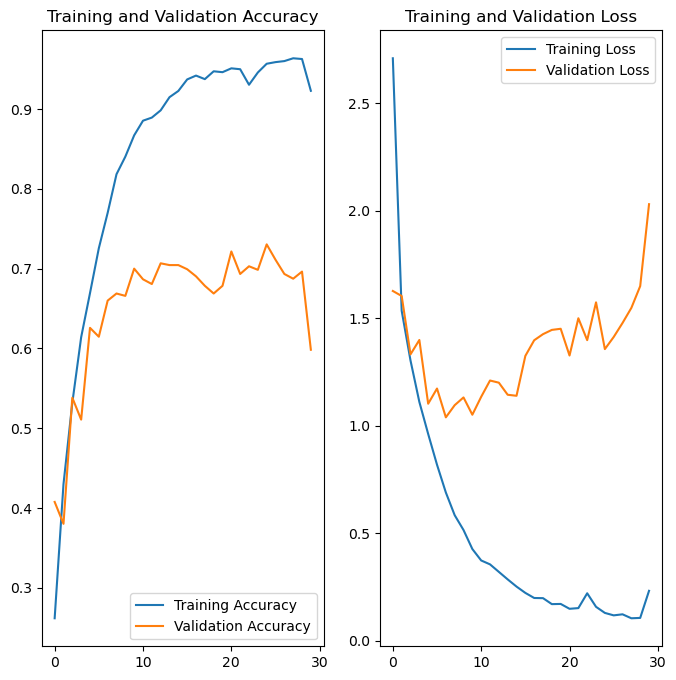

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### ** Overfitting problem is fixed with class rebalance. Both Accuracy and Loss trend are consistent now **

